In [1]:
import pandas as pd
import numpy as np

/tmp/ipykernel_4888/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('bank_churn_dataset.csv')

In [3]:
df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

Dataset is little imbalanced

In [6]:
df.drop_duplicates(inplace=True)

'Exited' is the dependent variable, to be predicted

### Statistical analysis

In [7]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Checking for null values

In [8]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram of the target feature

/tmp/ipykernel_4888/2301208354.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Exited'], bins=20, kde=True, palette=palette)


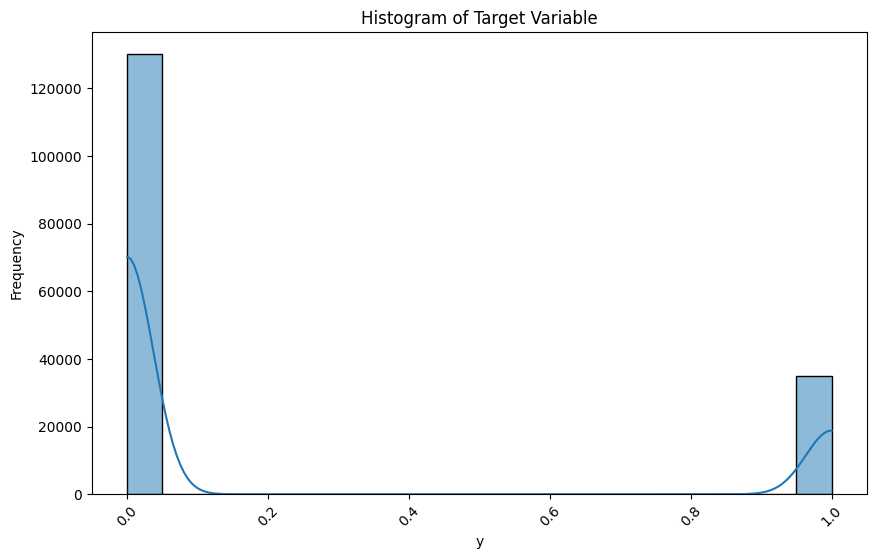

In [10]:
palette = sns.color_palette("husl", 6)

plt.figure(figsize=(10, 6))
sns.histplot(df['Exited'], bins=20, kde=True, palette=palette)
plt.title('Histogram of Target Variable')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Seeing the output feature, we can say the data is imbalanced

In [11]:
# These features 'id', 'CustomerId' 'Surname' seem irrelevant to target feature, let's drop them
df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)

Printing the unique values from the remaining categorical features, before encoding

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    for value in unique_values:
        print(value)
    print("\n")

Unique values in column 'Geography':
France
Spain
Germany


Unique values in column 'Gender':
Male
Female




Let's encode the categorical features

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])

In [14]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int64  
 2   Gender           165034 non-null  int64  
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 13.9 MB


### Histogram

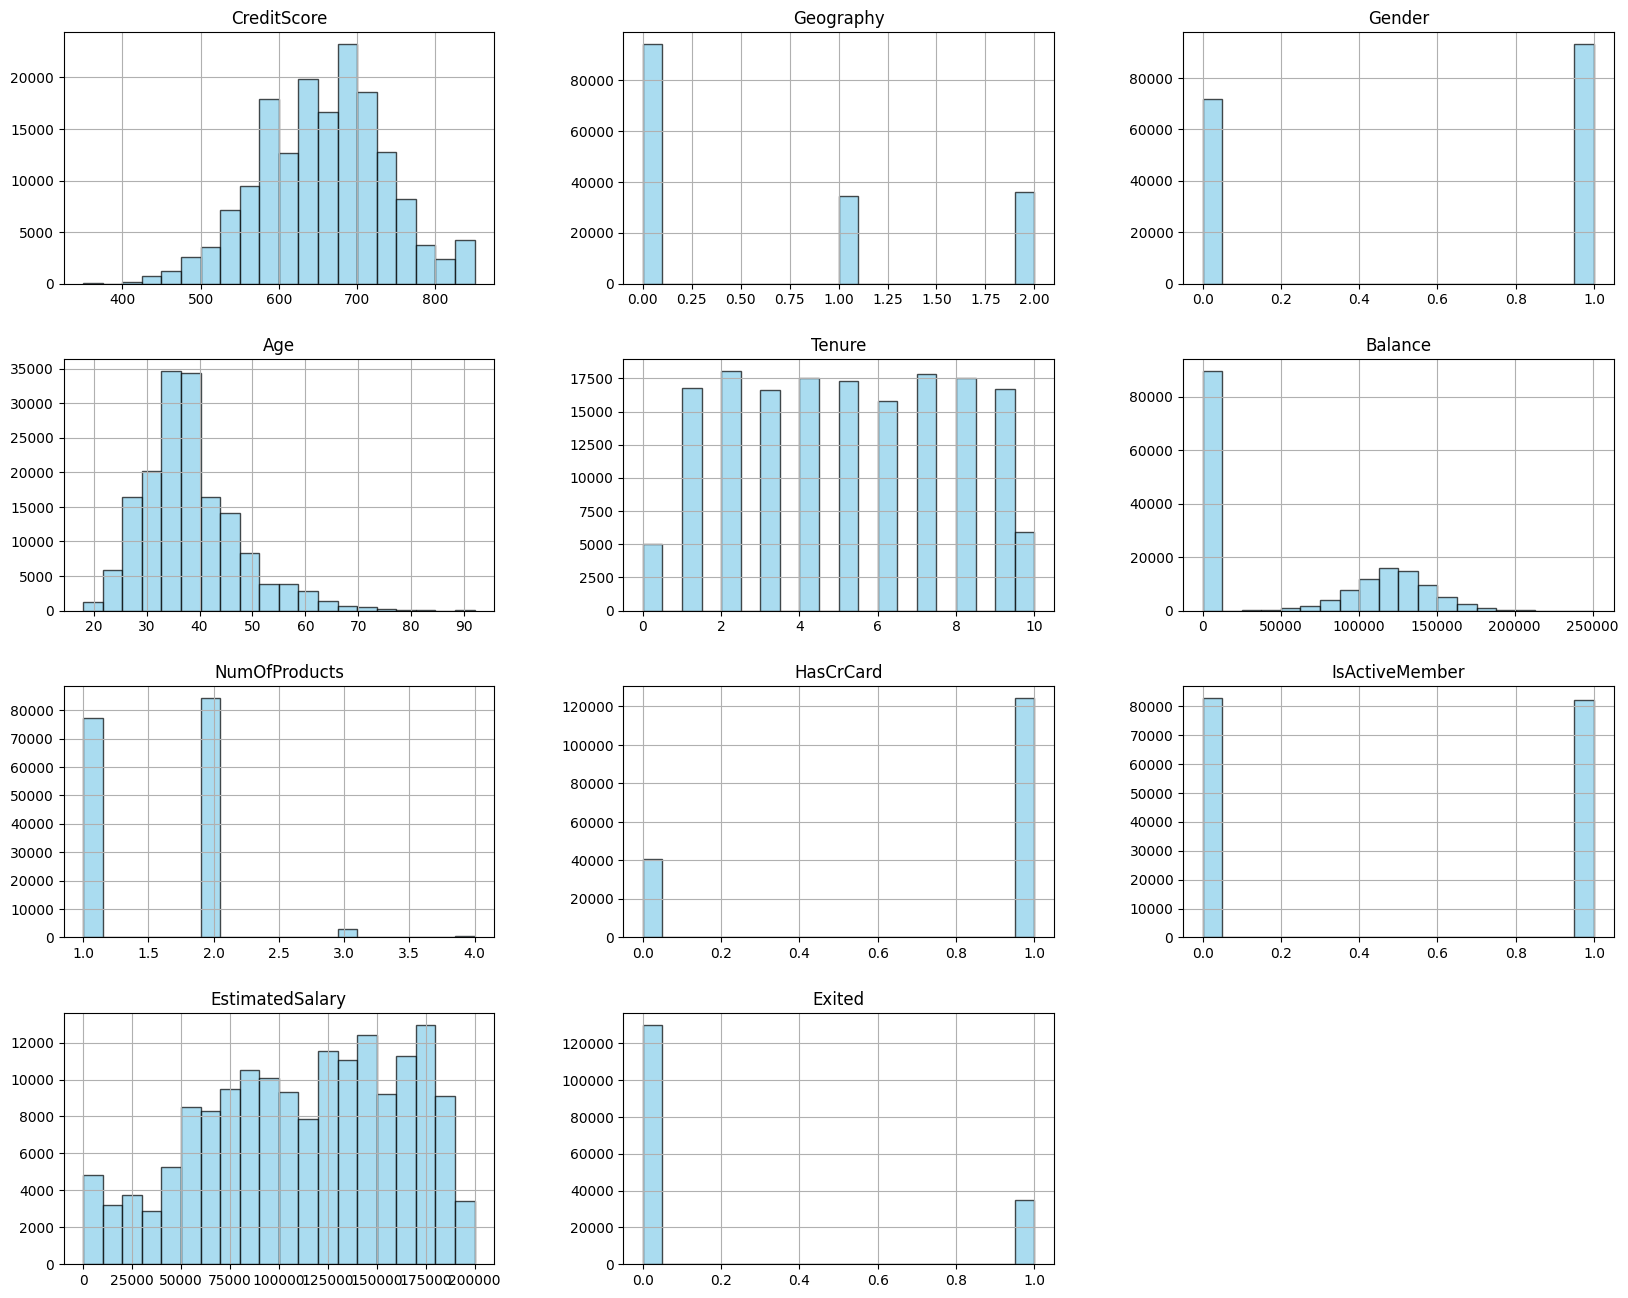

In [16]:
df.hist(bins=20, color='skyblue', edgecolor='black', figsize=(20, 16), alpha=0.7)
plt.show()

**Checking correlation of all the features with the dependent feature**

In [17]:
correlation = df.corr()['Exited'].sort_values(ascending=False)
print(correlation)

Exited             1.000000
Age                0.340768
Balance            0.129743
Geography          0.053343
EstimatedSalary    0.018827
Tenure            -0.019565
HasCrCard         -0.022141
CreditScore       -0.027383
Gender            -0.146442
IsActiveMember    -0.210237
NumOfProducts     -0.214554
Name: Exited, dtype: float64


'Age' is the most positively correlated feature with the output feature

***Correlation Heatmap***

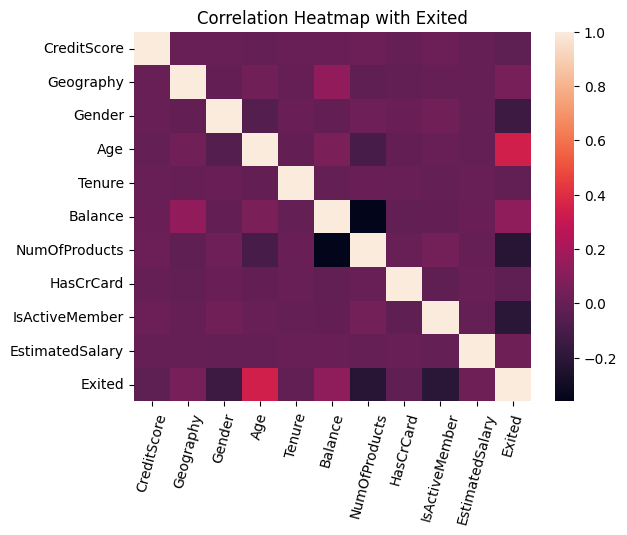

In [18]:
sns.heatmap(df.corr())
figsize = (15,15)
plt.title('Correlation Heatmap with Exited')
plt.xticks(rotation=75)
plt.show()

Setting independent and dependent variables

In [19]:
X = df.drop('Exited', axis=1)
y = df['Exited']

Train test splitting

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling the data

In [21]:
# pip install imbalanced-learn


In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

***Training the model***

In [25]:
import xgboost as xgb
classifier = xgb.XGBClassifier()
classifier.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Making predictions

In [26]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test_scaled)

Model Evaluation

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Evaluation Metrics:
Accuracy: 0.8582
Precision: 0.6723
Recall: 0.6377
F1-Score: 0.6545


In [28]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.7773414350307294


### Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[23890  2162]
 [ 2520  4435]]


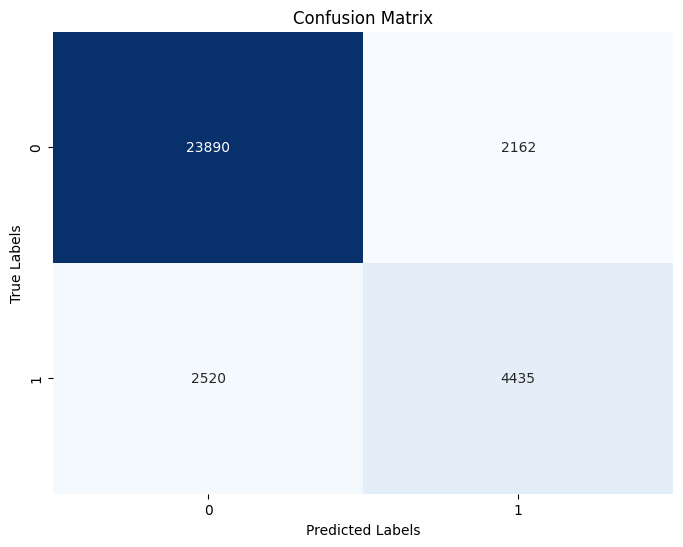

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## We can perform hyperparameter tuning to improve the accuracy

In [31]:
import joblib

joblib.dump(classifier, 'model.pkl')

['model.pkl']